Suppose you want to know if money makes people happy, so you download the Better Life Index data from the OECD’s website as well as stats about GDP per capita from the IMF’s website.

• Study the data.

• Select a model.

• Train it on the training data.

• Apply the model to make predictions on new cases (this is called inference).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the data

better_life_index_data = pd.read_csv('oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',encoding='latin1',na_values="n/a")

In [2]:
# Prepare the data

def preparing_country_stats(better_life_index_data, gdp_per_capita):
    better_life_index_data = better_life_index_data[better_life_index_data["INEQUALITY"]=="TOT"]
    better_life_index_data = better_life_index_data.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015":"GDP per Capita"},inplace=True)
    gdp_per_capita.set_index("Country",inplace=True)
    country_statistics = pd.merge(left=better_life_index_data,right=gdp_per_capita,left_index=True,right_index=True)
    country_statistics.sort_values(by="GDP per Capita",inplace=True)
    return country_statistics[["GDP per Capita", 'Life satisfaction']].iloc[[4, 14, 19, 29, 32]]

country_stats = preparing_country_stats(better_life_index_data, gdp_per_capita)
country_stats

,GDP per Capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


In [3]:
X = np.c_[country_stats["GDP per Capita"]]
y = np.c_[country_stats["Life satisfaction"]]

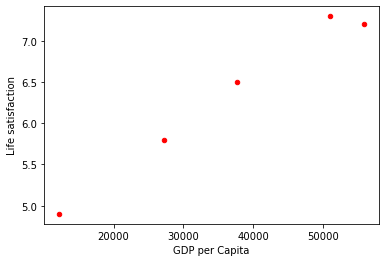

In [4]:
# Visualize the data

country_stats.plot(kind='scatter', x="GDP per Capita", y='Life satisfaction',color='red')
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

# Select a linear model

linear_model = LinearRegression()

# Train the model

linear_model.fit(X, y)

# Make a prediction for Cyprus

X_new = [[22587]] # Cyprus' GDP per capita
print(linear_model.predict(X_new))

[[5.54334198]]


Replacing the Linear Regression model with k-Nearest Neighbors (in this example, k = 3) regression in the previous code is as simple as replacing these two lines:

In [6]:
from sklearn.neighbors import KNeighborsRegressor

# Select a KNN model

knn_model = KNeighborsRegressor(n_neighbors=3)

# Train the model

knn_model.fit(X, y)

# Make a prediction for Cyprus

X_new = [[22587]] # Cyprus' GDP per capita
print(knn_model.predict(X_new))

[[5.73333333]]
